In [1]:
include("../data/synthetic.jl")
using .Synthetic
using PyPlot
using Seaborn
using Random
using LinearAlgebra
using StatsBase
using Gen
using StatsFuns
using Statistics
using TOML
using Glob
Random.seed!(1234)

MersenneTwister(UInt32[0x000004d2], Random.DSFMT.DSFMT_state(Int32[-1393240018, 1073611148, 45497681, 1072875908, 436273599, 1073674613, -2043716458, 1073445557, -254908435, 1072827086  …  -599655111, 1073144102, 367655457, 1072985259, -1278750689, 1018350124, -597141475, 249849711, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

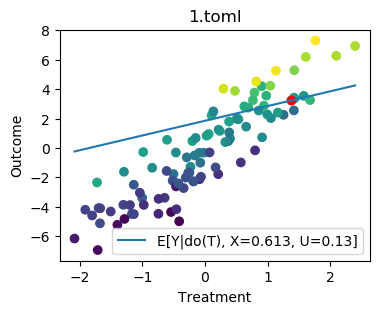

PyObject Text(24.0, 0.5, 'Outcome')

In [2]:
path = "../data/synthetic/" * string(1) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))
# hist(U[T.==0], alpha=0.4, density=true)
# hist(U[T.==1], alpha=0.4, density=true)

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

# plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1.5, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
# plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1.5, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")

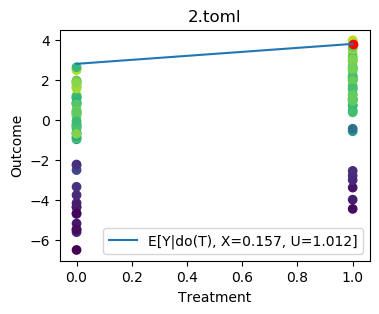

PyObject Text(24.0, 0.5, 'Outcome')

In [3]:
path = "../data/synthetic/" * string(2) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
# ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
# ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

# plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1.5, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
# plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1.5, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")

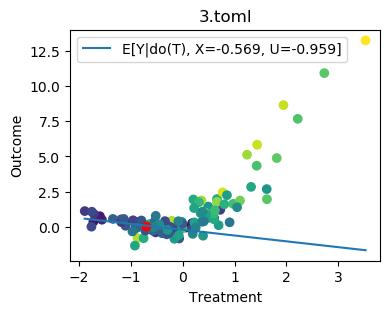

PyObject Text(24.000000000000007, 0.5, 'Outcome')

In [4]:
path = "../data/synthetic/" * string(3) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
# ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1, 100), fill.(epsY[1], 100))
# ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

# plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
# plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")

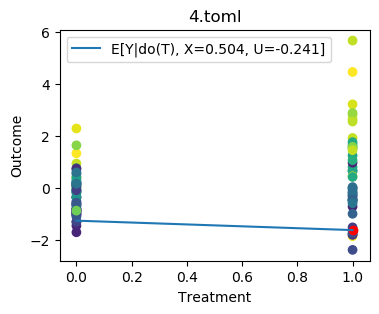

In [5]:
path = "../data/synthetic/" * string(4) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

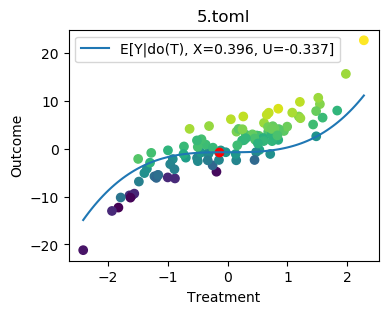

In [6]:
path = "../data/synthetic/" * string(5) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

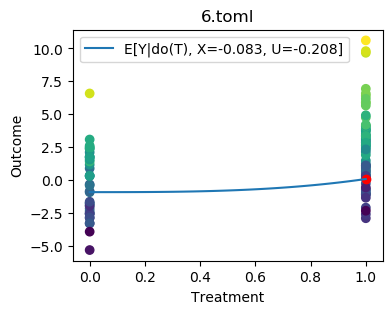

In [7]:
path = "../data/synthetic/" * string(6) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

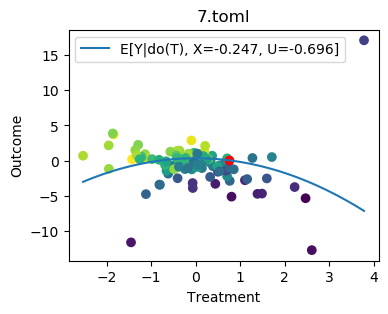

In [8]:
path = "../data/synthetic/" * string(7) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

# plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
# plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

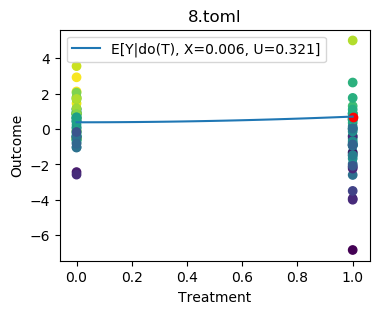

In [9]:
path = "../data/synthetic/" * string(8) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

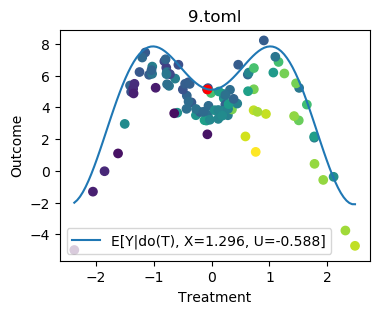

In [10]:
path = "../data/synthetic/" * string(9) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

# plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
# plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

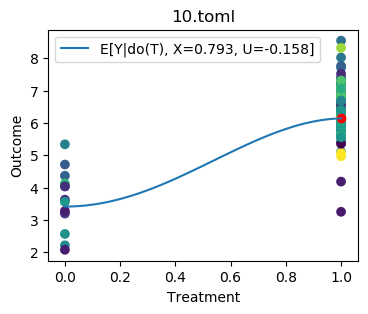

In [11]:
path = "../data/synthetic/" * string(10) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

# plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
# plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

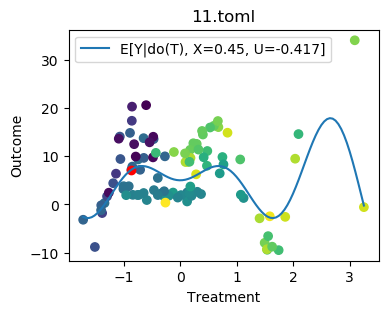

In [16]:
path = "../data/synthetic/" * string(11) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

# plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
# plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

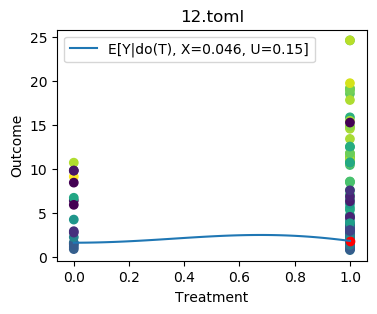

In [17]:
path = "../data/synthetic/" * string(12) * ".toml"
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic_confounder(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

# plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
# plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

In [15]:
# when xdim = 0, multiply by 1